In [1]:
#!/usr/bin/env python
# -*- encoding: utf-8 -*-
'''
@File    :   Okumura-Hata模型.ipynb
@Time    :   2025/05/05 17:06:48
@Author  :   Neutrin 
'''

# here put the import lib
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import matplotlib as mpl
# 设置中文字体支持
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像时负号'-'显示为方块的问题

# 确保Jupyter Notebook中的图表能正确显示中文
mpl.rc('font', family='SimHei')
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
# 参数设置
fc = 1.5e9  # 频率1.5GHz
htx = 30  # 基站高度30m
hrx = 2  # 接受天线的高度
d = np.linspace(1, 1000, 100)  # 距离从1km到1000km

In [7]:
def PL_Hata(fc, htx, hrx, d, EType='U'):
    """
    Okumura-Hata模型计算路径损耗
    :param fc: 频率（Hz）
    :param htx: 基站高度（m）
    :param hrx: 接收天线高度（m）
    :param d: 距离（km）
    :param EType: 环境类型，'U'为城区，'S'为郊区，'O'为开阔区
    :return: 路径损耗（dB）
    """
    fc = fc / 1e6  # 转换为MHz
    
    # 计算接收天线校正因子C_Rx
    if fc >= 150 and fc <= 200:
        C_Rx = 8.29 * (np.log10(1.54 * hrx))**2 - 1.1
    elif fc > 200:
        C_Rx = 3.2 * (np.log10(11.75 * hrx))**2 - 4.97  # 式(1.9)
    else:
        C_Rx = 0.8 + (1.1 * np.log10(fc) - 0.7) * hrx - 1.56 * np.log10(fc)  # 式(1.8)
    
    # 计算基本路径损耗
    PL = 69.55 + 26.16 * np.log10(fc) - 13.82 * np.log10(htx) - C_Rx + \
         (44.9 - 6.55 * np.log10(htx)) * np.log10(d/1000)  # 式(1.7)
    
    # 根据环境类型进行修正
    EType = EType.upper()
    if EType == 'S':  # 郊区
        PL = PL - 2 * (np.log10(fc/28))**2 - 5.4  # 式(1.10)
    elif EType == 'O':  # 开阔区
        PL = PL + (18.33 - 4.78 * np.log10(fc)) * np.log10(fc) - 40.97  # 式(1.11)
    
    return PL

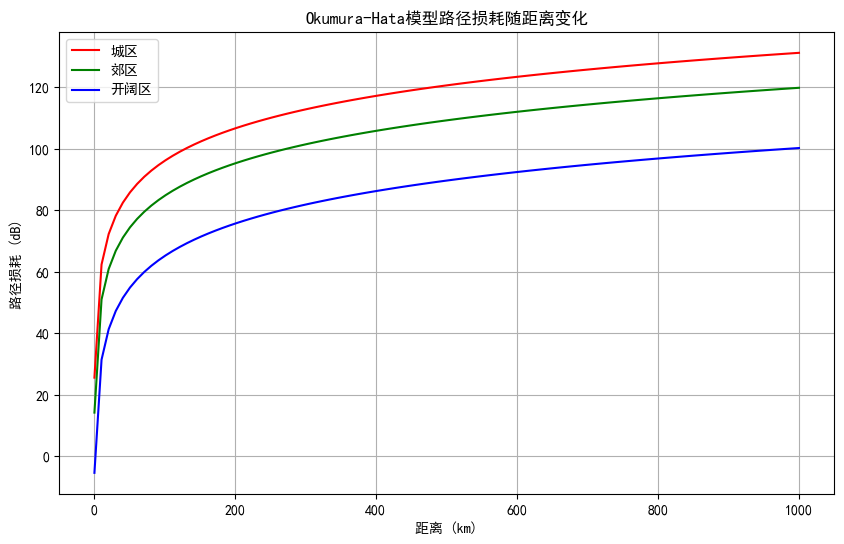

In [8]:
# 计算不同环境下的路径损耗
PL_urban = PL_Hata(fc, htx, hrx, d, 'U')  # 城区
PL_suburban = PL_Hata(fc, htx, hrx, d, 'S')  # 郊区
PL_open = PL_Hata(fc, htx, hrx, d, 'O')  # 开阔区

# 绘制路径损耗随距离的变化
plt.figure(figsize=(10, 6))
plt.plot(d, PL_urban, 'r-', label='城区')
plt.plot(d, PL_suburban, 'g-', label='郊区')
plt.plot(d, PL_open, 'b-', label='开阔区')
plt.xlabel('距离 (km)')
plt.ylabel('路径损耗 (dB)')
plt.title('Okumura-Hata模型路径损耗随距离变化')
plt.grid(True)
plt.legend()
plt.show()